In [412]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
with open('smartprix.html','r',encoding='utf-8') as f:
    html = f.read()

In [230]:
soup = BeautifulSoup(html,'lxml')

In [ ]:
soup.prettify

In [231]:
container = soup.find_all('div',class_="sm-product has-tag has-features has-actions")

In [232]:
name = []
price = []
specs = []
all_specs = []
sims = []
processor = []
ram = []
battery = []
display = []
camera = []
card = []
os = []
for i in container:
    try:
        sim.append(x[0].text)
    except:
        sim.append(np.nan)
    name.append(i.find('h2').text)
    price.append(i.find('span').text)
    try:
        specs.append(i.find('b').text)
    except:
        specs.append(0)

         
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        sims.append(x[0].text)      
    except:
        sims.append(np.nan)
        
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        processor.append(x[1].text)      
    except:
        processor.append(np.nan)
        
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        ram.append(x[2].text)      
    except:
        ram.append(np.nan)
        
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        battery.append(x[3].text)      
    except:
        battery.append(np.nan)
        
    try:
        x =i.find('ul',class_="sm-feat specs").find_all('li')
        display.append(x[4].text)      
    except:
        display.append(np.nan)
        
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        camera.append(x[5].text)     
    except:
        camera.append(np.nan)
        
    try:
        x =i.find('ul',class_="sm-feat specs").find_all('li')
        card.append(x[6].text)      
    except:
        card.append(np.nan)
    
    try:
        x = i.find('ul',class_="sm-feat specs").find_all('li')
        os.append(x[7].text)      
    except:
        os.append(np.nan)
 

In [237]:
len(sims)

960

In [234]:
len(price)

960

In [238]:
phone = pd.DataFrame({
    'model':name,
    'price':price,
    'ratings':specs,
    'sim':sims,
    'processor':processor,
    'ram':ram,
    'battery':battery,
    'display':display,
    'camera':camera,
    'card':card,
    'os':os
})

In [239]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   model      960 non-null    object
 1   price      960 non-null    object
 2   ratings    960 non-null    object
 3   sim        959 non-null    object
 4   processor  959 non-null    object
 5   ram        959 non-null    object
 6   battery    959 non-null    object
 7   display    959 non-null    object
 8   camera     953 non-null    object
 9   card       909 non-null    object
 10  os         824 non-null    object
dtypes: object(11)
memory usage: 82.6+ KB


In [240]:
phone['ratings'] = phone['ratings'].astype('int')

## Data Assessing

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [296]:
phone = pd.read_csv('smartphones.csv')

In [297]:
phone.head(3)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13


In [298]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [299]:
phone.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [300]:
# make a copy
df = phone.copy()

In [301]:
df['price'] = df['price'].str.replace(',','').str.replace('₹','').astype('int')

In [302]:
df1 = df.reset_index()

In [303]:
df1['index'] = df1['index'] + 2

In [304]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [305]:
df1[df1.index.isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
100,102,Apple iPhone 14 Pro,119990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core Processor","6 GB RAM, 128 GB inbuilt",3200 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
113,115,Samsung Galaxy A53 5G,31999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1280, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP Quad Rear & 32 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
151,153,Motorola Moto G52,11999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","Snapdragon 680, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card (Hybrid),Android v12
157,159,OPPO F21 Pro 5G,25969,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px Display with Punch...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12
161,163,Cola Phone,14999,74.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G99, Octa Core, 2.2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.4 inches, 1080 x 2400 px, 90 Hz Display with...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
238,240,OPPO Reno 8 Z,26990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px Display with Punch...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12
273,275,Infinix Note 12i (2022),9999,73.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G85, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2400 px Display with Water ...",50 MP + 2 MP Triple Rear & 8 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v12
308,310,OnePlus 10T (16GB RAM + 256GB),55999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4800 mAh Battery with 150W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
309,311,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP Quad Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
323,325,Apple iPhone 14 Plus (256GB),84999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 256 GB inbuilt",4325 mAh Battery with Fast Charging,"6.7 inches, 1284 x 2778 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16


In [306]:
df1[df1.index.isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
642,644,POCO F4 GT 5G,39999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 20 MP Front ...,Memory Card Not Supported,Android v12
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
649,651,Huawei Mate 40 Pro 4G,69990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Kirin 9000, Octa Core, 3.13 GHz Processor","8 GB RAM, 128 GB inbuilt",4400 mAh Battery with 66W Fast Charging,"6.76 inches, 1344 x 2772 px, 90 Hz Display wit...",50 MP + 20 MP + 12 MP Triple Rear & 13 MP Dual...,"Memory Card (Hybrid), upto 256 GB",Harmony v2.0
659,661,OnePlus Nord 5,34999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9200, Octa Core Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.57 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 12 MP + 5 MP Triple Rear & 32 MP Front...,Android v13,No FM Radio
667,669,OPPO A96 4G,17999,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 680, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 90 Hz Display wit...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Memory Card Supported,Android v11
750,752,Vivo U3,9990,72.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 675, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.53 inches, 1080 x 2340 px Display with Water...",16 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 256 GB",Android v9.0 (Pie)
759,761,Xiaomi Redmi K60 Gaming Edition,54990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3200 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 20 MP Front ...,Android v13,No FM Radio
819,821,OnePlus Nord N300,18990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 810 5G, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.56 inches, 720 x 1612 px, 90 Hz Display with...",48 MP + 2 MP Dual Rear & 16 MP Front Camera,Memory Card Supported,Android v12
884,886,Huawei Nova 10,29990,82.0,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon 778G, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with 66W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 60 MP Front ...,HarmonyOS,No FM Radio
927,929,Samsung Guru E1200,1685,NaN,Single Sim,No Wifi,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,NaN,NaN


In [307]:
df1 = df1[df1['price'] >= 3400]

In [309]:
df1.shape

(991, 12)

In [310]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [311]:
df1.drop([645,857,882,925],inplace=True)

In [312]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [313]:
df1.drop([582],inplace=True)

In [314]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [315]:
df1.drop([376,754],inplace=True)

In [316]:
temp_df = df1[df1['index'].isin(battery_rows)]

In [317]:
x = temp_df.iloc[:,7:].shift(1,axis=1).values

In [318]:
x_index = temp_df.index

In [319]:
df1.loc[temp_df.index,temp_df.columns[7:]] = x

In [320]:
df1[df1['index'].isin(camera_rows)]
# 155, 271

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",NaN,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [321]:
df1.drop([155,271],inplace=True)

In [322]:
temp_df = df1[df1['index'].isin(camera_rows)]

In [323]:
temp_df = temp_df[temp_df['camera'].str.contains('isplay')]

In [324]:
df1.loc[temp_df.index,'camera'] = temp_df['card'].values

In [325]:
temp_df = df1[df1.card.str.contains('MP')]

In [326]:
pd.set_option('display.max_rows',None)

In [327]:
df1.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [328]:
temp_df = df1[~df1['card'].str.contains('Card') ]

In [329]:
df1.loc[temp_df.index,'os'] = temp_df['card'].values

In [330]:
df1.loc[temp_df.index,'card'] = 'Memory Card Not Supported'

In [331]:
df1.card.value_counts()

Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: card, dtype: int64

In [332]:
temp_df = df1[df1.os.str.contains('Memory')]
df1.loc[temp_df.index,'os'] = 'NAN'

In [333]:
temp_df = df1[df1.os.str.contains('lue')]
df1.loc[temp_df.index,'os'] = 'NAN'

In [334]:
temp_df = df1[df1.os.str.contains('NAN')]
df1.loc[temp_df.index,'os'] = np.nan

In [335]:
df1.shape

(982, 12)

In [336]:
# 4% values are lost
(982/1020)*100

96.27450980392157

In [337]:
df1.os.value_counts()

Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v11.0                        4
iOS v13                              4
Android v8.0 (Oreo)                  4
iOS v15.0                            3
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
EMUI v12                             2
Android v12.1                        2
iOS v14.0                            2
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
Android v4.4.2 (KitKat)  

In [338]:
df1.head(2)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [339]:
brand_names = df1['model'].str.split(' ').str.get(0)

In [340]:
df1.insert(1,'brand_name',brand_names)

In [341]:
df1['brand_name'] = df1['brand_name'].str.lower()

In [342]:
has_5g = df1.sim.str.contains('5G')
has_nfc = df1.sim.str.contains('NFC')
has_ir = df1.sim.str.contains('IR Blaster')

In [343]:
df1.insert(6,'has_5g',has_5g)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_ir_blaster',has_ir)

In [344]:
processor_name = df1.processor.str.split(',').str.get(0)
num_cores = df1.processor.str.split(',').str.get(1)
speed = df1.processor.str.split(',').str.get(2)

In [345]:
df1.insert(10,'processor_name',processor_name)
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',speed)

In [346]:
df1['processor_name'] = df1.processor_name.str.strip()

In [347]:
temp_df = df1[df1.processor_name.str.contains('Core')][['processor_name','num_cores','processor_speed']].shift(1,axis=1)

In [348]:
df1.loc[temp_df.index,['processor_name','num_cores','processor_speed']] = temp_df.values

In [349]:
df1[df1.processor_name == '(28 nm)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [350]:
df1.loc[856,'processor_name'] = 'Mediatek MT6739'

In [351]:
processor_brand = df1.processor_name.str.split(' ').str.get(0).str.lower()

In [352]:
df1.insert(11,'processor_brand',processor_brand) 

In [353]:
df1['num_cores'] = df1.num_cores.str.strip()

In [354]:
df1['num_cores'] = df1.num_cores.str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

In [355]:
df1['processor_speed'] = df1['processor_speed'].str.replace('\u2009GHz Processor','').astype('float')

In [356]:
temp_df = df1[df1['processor_brand']=='a13']
df1.loc[temp_df.index,'processor_brand']='bionic'

temp_df = df1[df1['processor_brand']=='spreadtrum']
df1.loc[temp_df.index,'processor_brand']='unisoc'

temp_df = df1[df1['processor_brand']=='qualcomm']
df1.loc[temp_df.index,'processor_brand']='snapdragon'

df1.loc[491,'processor_brand']='snapdragon'
df1.loc[869,'processor_brand']='exynos'
df1.loc[[294,972],'processor_brand']='unisoc'
df1.loc[858,'processor_brand']='dimensity'
df1.loc[856,'processor_brand']='dimensity'
df1.loc[263,'processor_brand']='bionic'
df1.loc[607,'processor_brand']='bionic'

In [357]:
# 483 = 512
# 439, 762 = 64

In [358]:
ram_capacity = df1.ram.str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [359]:
df1.insert(16,'ram_capacity',ram_capacity)

In [360]:
df1['ram_capacity'] = df1['ram_capacity'].astype('int')

In [361]:
df1.loc[483,'ram'] = np.nan
df1.loc[[439, 762],'ram'] = np.nan

In [362]:
rom = df1.ram.str.strip().str.split(',').str.get(1).str.findall(r'\b(\d+)\b').str.get(0)

In [363]:
df1.insert(17,'internal_memory',rom)

In [364]:
df1.internal_memory.value_counts()

128    524
64     191
256    157
32      67
512     21
16      12
1        5
4        1
8        1
Name: internal_memory, dtype: int64

In [365]:
# 486, 627 -> feature phone
df1.drop([486, 627],inplace=True)

In [366]:
temp_df = df1[df1.internal_memory == '1']
df1.loc[temp_df.index,'internal_memory'] = 1024

In [367]:
df1.loc[483,'internal_memory'] = 512
df1.loc[[439, 762],'internal_memory'] = 64

In [368]:
df1['internal_memory'] = df1['internal_memory'].astype('int')

In [369]:
df1.loc[[439, 762],'ram_capacity'] = 4
df1.loc[483,'ram_capacity'] = 12

In [370]:
df1.ram_capacity.value_counts()

8     339
6     234
4     217
12     86
3      54
2      32
16      9
1       7
18      2
Name: ram_capacity, dtype: int64

In [371]:
df1.internal_memory.value_counts()

128     523
64      193
256     157
32       67
512      22
16       12
1024      5
8         1
Name: internal_memory, dtype: int64

In [372]:
battery = df1.battery.str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype('float')

In [373]:
df1.insert(16,'battery_capacity',battery) 

In [374]:
fast_charging = df1.battery.str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [375]:
df1.insert(17,'fast_charging',fast_charging) 

In [376]:
def fast_charging_extractor(item):
    
    if type(item) == list:
        if len(item) == 1:
            return item[0]
        else:
            return 0
    else:
        return -1

In [377]:
df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype('int')

In [378]:
screen = df1.display.str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype('float')
df1.insert(21,'screen_size',screen)

In [379]:
res = df1.display.str.strip().str.split(',').str.get(1).str.strip().str.split(' ').str.get(0).str.strip().str.split('px').str.get(0).str.strip()
df1.insert(22,'resolution',res)

In [380]:
ref_rate = df1.display.str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x: 60 if pd.isna(x) else x).astype('int')
df1.insert(23,'refrest_rate',ref_rate)

In [381]:
def camera_extractor(text):
    
    if 'quad' in text.lower():
        return '4'
    elif 'triple' in text.lower():
        return '3'
    elif 'dual' in text.lower():
        return '2'
    elif 'missing' in text.lower():
        return 'missing'
    else:
        return '1'
    

In [382]:
num_rear = df1.camera.str.strip().str.split('&').str.get(0).apply(camera_extractor)
df1.insert(25,'num_rear_cameras',num_rear)

In [383]:
df1[df1.camera.str.contains('isplay')]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,resolution,refrest_rate,camera,num_rear_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.2,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,8,256,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.1,1792 x 1920,120,"Foldable Display, Dual Display",2,Memory Card Not Supported,Android v12


In [384]:
df1.loc[69,'num_rear_cameras'] = 3

In [385]:
num_front = df1.camera.str.strip().str.split('&').str.get(1).str.strip().fillna('missing').apply(camera_extractor)
df1.insert(26,'num_front_cameras',num_front)

In [386]:
df1[df1['num_front_cameras'] == 'missing']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,resolution,refrest_rate,camera,num_rear_cameras,num_front_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,8,256,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,1792 x 1920,120,"Foldable Display, Dual Display",3,missing,Memory Card Not Supported,Android v12
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 855+, Octa Core, 2.96 GHz Processor",Snapdragon 855+,snapdragon,Octa Core,2.96,"12 GB RAM, 512 GB inbuilt",4050 mAh Battery with 40W Fast Charging,4050.0,40,12,512,"7.92 inches, 2088 x 2250 px Display",7.92,2088 x 2250,60,108 MP + 20 MP + 12 MP Triple Rear Camera,3,missing,Memory Card Not Supported,Android v10
993,995,huawei,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Kirin 990, Octa Core, 2.86 GHz Processor",Kirin 990,kirin,Octa Core,2.86,"8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,4500.0,55,8,512,"8 inches, 2200 x 2480 px Display",8.00,2200 x 2480,60,48 MP Quad Rear Camera,4,missing,Memory Card Not Supported,NaN
1012,1014,itel,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor",Spreadtrum SC9832E,unisoc,Quad Core,1.40,"2 GB RAM, 32 GB inbuilt",3020 mAh Battery,3020.0,-1,2,32,"5 inches, 854 x 480 px Display",5.00,854 x 480,60,2 MP Rear Camera,1,missing,Memory Card Not Supported,Android v11


In [387]:
df1.loc[69,'camera'] == '50 MP'

False

In [388]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']

In [389]:
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [390]:
df1['primary_camera_rear'] = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [391]:
df1['primary_camera_front'] = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [392]:
df1.loc[613,'primary_camera_front'] = 20

In [393]:
temp_df = df1[df1['card'] == 'Memory Card (Hybrid)']

In [394]:
df1.loc[temp_df.index, 'card'] = 'Not Specified'

In [395]:
df1['extended_memory'] = df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')

In [396]:
def os_extractor(text):

    if 'Android' in text:
        return 'android'
    elif 'iOS' in text:
        return 'ios'
    elif 'Harmony' in text or 'Hongmeng' in text or 'EMUI' in text:
        return 'other'

In [406]:
df1.os.fillna('Not Specified',inplace=True)

In [398]:
df1['os'] = df1.os.apply(os_extractor)

In [399]:
df =  df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [400]:
pd.set_option('display.max_columns',None)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int32  
 3   rating                879 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_name        960 non-null    object 
 8   processor_brand       960 non-null    object 
 9   num_cores             974 non-null    object 
 10  processor_speed       938 non-null    float64
 11  battery_capacity      969 non-null    float64
 12  fast_charging         980 non-null    int32  
 13  ram_capacity          980 non-null    int32  
 14  internal_memory       980 non-null    int32  
 15  screen_size           

In [404]:
df.shape

(980, 24)

In [407]:
df.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_name           20
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           0
screen_size               0
resolution                0
refrest_rate              0
num_rear_cameras          0
num_front_cameras         0
os                        0
primary_camera_rear       0
primary_camera_front      4
extended_memory           0
dtype: int64

In [408]:
# brand name
df['brand_name'].value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64

<AxesSubplot:>

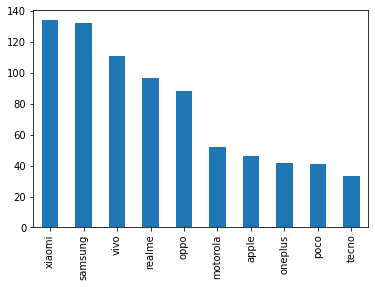

In [409]:
# top 10 phone brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

In [410]:
# price col
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

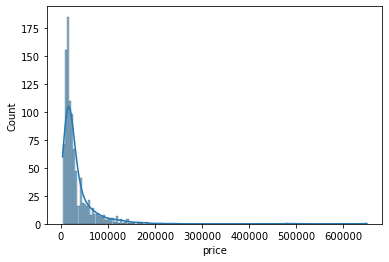

In [413]:
sns.histplot(df['price'],kde=True)

In [414]:
df['price'].skew()

6.591790999665567

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

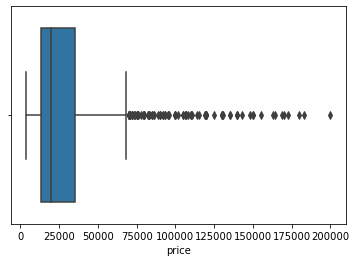

In [415]:
sns.boxplot(df[df['price']<200000]['price'])

In [416]:
df['price'].isnull().sum()

0

In [417]:
# rating col
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Count'>

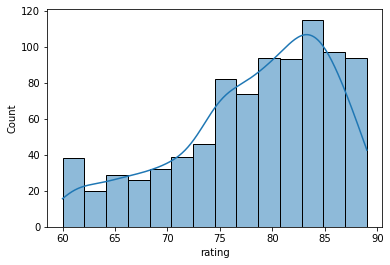

In [418]:
sns.histplot(df['rating'],kde=True)

In [419]:
df['rating'].skew()

-0.6989993034105535

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

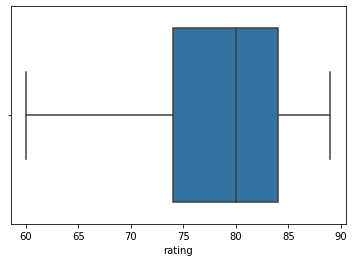

In [420]:
sns.boxplot(df['rating'])

In [421]:
df['rating'].isnull().sum()

101

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_5g', ylabel='count'>

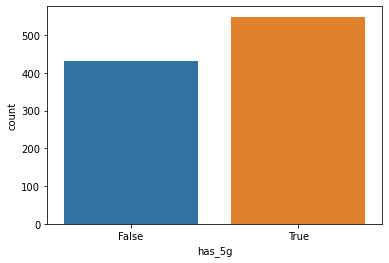

In [422]:
sns.countplot(df['has_5g'])

In [423]:
df['has_5g'].value_counts()

True     549
False    431
Name: has_5g, dtype: int64

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_nfc', ylabel='count'>

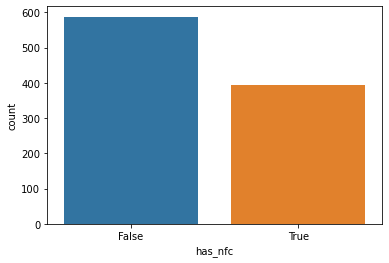

In [424]:
sns.countplot(df['has_nfc'])

In [425]:
df['has_nfc'].value_counts()

False    587
True     393
Name: has_nfc, dtype: int64

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_ir_blaster', ylabel='count'>

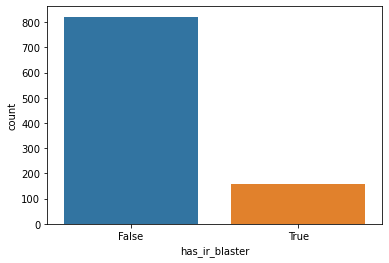

In [426]:
sns.countplot(df['has_ir_blaster'])

In [427]:
df['processor_brand'] = df['processor_brand'].str.replace('sanpdragon','snapdragon')
df['processor_brand'] = df['processor_brand'].str.replace('apple','bionic')
df['processor_brand'] = df['processor_brand'].str.replace('samsung','exynos')

In [429]:
df['processor_brand'].value_counts()

snapdragon    412
helio         201
dimensity     179
exynos         50
bionic         46
unisoc         32
tiger          24
google          9
kirin           7
Name: processor_brand, dtype: int64

In [430]:
df[df['processor_brand'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refrest_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,NaN,NaN,Octa Core,NaN,5000.0,120,16,512,6.73,1080 x 2448,165,3,1,android,50,32,0
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,NaN,Quad Core,1.4,2800.0,-1,2,64,5.00,720 x 1280,60,1,1,android,5,2,128 GB
188,ikall,iKall Z19 Pro,8099,60.0,False,False,False,NaN,NaN,Quad Core,1.6,5000.0,-1,4,64,6.50,720 x 1600,60,1,1,android,13,8,128 GB
201,samsung,Samsung Galaxy A13,14450,75.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,4,64,6.60,1080 x 2408,60,4,1,android,50,8,1 TB
309,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,4,128,6.60,1080 x 2408,60,4,1,android,50,8,1 TB
315,itel,itel S16 Pro,6990,NaN,False,False,False,NaN,NaN,Quad Core,1.3,4000.0,-1,2,32,6.60,1600 x 720,60,3,1,android,8,8,32 GB
496,samsung,Samsung Galaxy A15,15990,63.0,False,False,False,NaN,NaN,Octa Core,NaN,5000.0,0,6,64,6.50,720 x 1600,60,3,1,android,48,8,1 TB
529,samsung,Samsung Galaxy F14,14990,67.0,False,True,False,NaN,NaN,Octa Core,NaN,5000.0,25,4,64,6.62,2408 x 1080,60,3,1,android,50,16,1 TB
587,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,6,128,6.60,1080 x 2408,60,4,1,android,50,8,1 TB
758,ikall,iKall Z19,7999,61.0,False,False,False,NaN,NaN,Quad Core,1.6,5000.0,-1,4,32,6.50,720 x 1600,60,1,1,android,20,13,128 GB


In [431]:
df['num_cores'].value_counts()

Octa Core    899
Hexa Core     39
Quad Core     36
Name: num_cores, dtype: int64

In [432]:
df['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

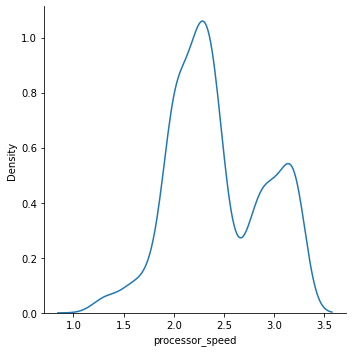

In [433]:
sns.displot(kind='kde',data=df,x='processor_speed')

In [434]:
df['processor_speed'].skew()

0.18833557463624606

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='processor_speed'>

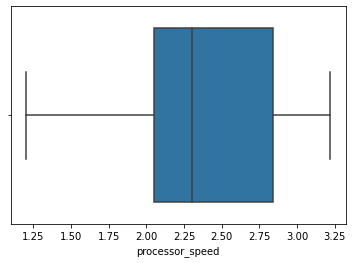

In [435]:
sns.boxplot(df['processor_speed'])

In [437]:
df['battery_capacity'].describe()

count      969.000000
mean      4817.748194
std       1009.540054
min       1821.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

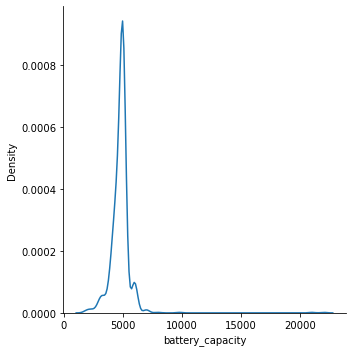

In [438]:
sns.displot(kind='kde',data=df,x='battery_capacity')

In [439]:
df[df['battery_capacity'] > 7000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refrest_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
394,oukitel,Oukitel WP19,29990,84.0,False,True,False,Helio G95,helio,Octa Core,2.0,21000.0,33,8,256,6.78,1080 x 2400,60,3,1,android,64,16,Not Specified
613,oukitel,Oukitel WP21,22990,82.0,False,False,False,Helio G99,helio,Octa Core,2.2,9800.0,66,12,256,6.78,1080 x 2400,120,3,1,Not Specified,64,20,0
874,doogee,Doogee V Max,45999,88.0,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,22000.0,33,12,256,6.58,1080 x 2408,120,3,1,android,108,32,2 TB
1006,oukitel,Oukitel WP9,25899,72.0,False,True,False,Helio P60,helio,Octa Core,2.0,8000.0,-1,6,128,5.86,720 x 1520,60,3,1,android,16,8,Not Specified


In [440]:
df['fast_charging'].describe()

count    980.000000
mean      36.048980
std       35.948034
min       -1.000000
25%       15.000000
50%       30.000000
75%       65.000000
max      240.000000
Name: fast_charging, dtype: float64

In [441]:
def fast(row):

    if row['fast_charging'] == -1:
        return 0
    else:
        return 1

In [442]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_name', 'processor_brand', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'resolution', 'refrest_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory'],
      dtype='object')

In [443]:
x = df.apply(fast,axis=1)
df.insert(12,'fast_charging_available',x)

In [444]:
df['fast_charging'] = df['fast_charging'].apply(lambda x:np.nan if x == 0 or x == -1 else x)

In [445]:
df['ram_capacity'].value_counts()

8     339
6     234
4     217
12     86
3      54
2      32
16      9
1       7
18      2
Name: ram_capacity, dtype: int64

In [446]:
temp_df = df[df['internal_memory'].isnull()]

In [447]:
df.loc[temp_df.index,['ram_capacity','internal_memory']] = [[4,64],[4,64]]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refrest_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory


In [448]:
df['internal_memory'].value_counts()

128     523
64      193
256     157
32       67
512      22
16       12
1024      5
8         1
Name: internal_memory, dtype: int64

In [449]:
df['screen_size'].describe()

count    980.000000
mean       6.536765
std        0.349162
min        3.540000
25%        6.500000
50%        6.580000
75%        6.670000
max        8.030000
Name: screen_size, dtype: float64

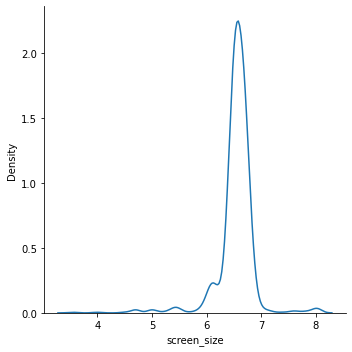

In [450]:
sns.displot(kind='kde',data=df,x='screen_size')

In [451]:
df['screen_size'].skew()

-2.11619902968816

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='screen_size'>

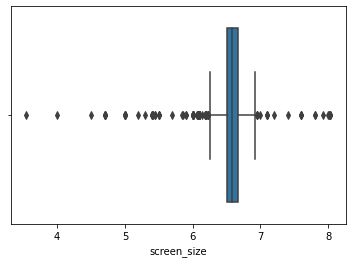

In [452]:
sns.boxplot(df['screen_size'])

In [453]:
df['extended_memory'].value_counts()

0                392
1 TB             262
512 GB           116
256 GB           100
Not Specified     88
128 GB             9
2 TB               6
32 GB              3
64 GB              3
1000 GB            1
Name: extended_memory, dtype: int64

In [454]:
df['extended_memory_available'] = df['extended_memory'].apply(lambda x:0 if x == '0' else 1)

In [455]:
def extended_extractor(row):

    if row['extended_memory_available'] == 0:
        return np.nan
    else:
        if row['extended_memory'] == '1 TB':
            return 1024
        elif row['extended_memory'] == '512 GB':
            return 512
        elif row['extended_memory'] == '256 GB':
            return 256
        elif row['extended_memory'] == 'Not Specified':
            return np.nan
        elif row['extended_memory'] == 'Memory Card (Hybrid)':
            return np.nan
        elif row['extended_memory'] == '128 GB':
            return 128
        elif row['extended_memory'] == '2 TB':
            return 2048
        elif row['extended_memory'] == '32 GB':
            return 32
        elif row['extended_memory'] == '64 GB':
            return 64
        elif row['extended_memory'] == '1000 GB':
            return 1000     

In [456]:
def extended_extractor(row):

    if row['extended_memory_available'] == 0:
        return np.nan
    else:
        if row['extended_memory'] == 'Not Specified':
            return np.nan
        elif row['extended_memory'] == 'Memory Card (Hybrid)':
            return np.nan
        else:
            return row['extended_memory']

In [458]:
x = df.apply(extended_extractor,axis=1).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [459]:
df['extended_upto'] = x

In [460]:
df['extended_upto'].value_counts()

1       262
512     116
256     100
128       9
2         6
32        3
64        3
1000      1
Name: extended_upto, dtype: int64

In [461]:
def transform(text):

    if text == '1':
        return '1024'
    elif text == '2':
        return '2048'
    elif text == '1000':
        return '1024'
    else:
        return text

In [462]:
df['extended_upto'] = df['extended_upto'].apply(transform)

In [465]:
def os_transform(text):

    if 'Memory' in text:
        return np.nan
    elif 'android' in text:
        return text
    elif 'ios' in text:
        return text
    else:
        return 'other'

In [466]:
df['os'] = df['os'].apply(os_transform)

In [467]:
df['extended_upto'].value_counts()

1024    263
512     116
256     100
128       9
2048      6
32        3
64        3
Name: extended_upto, dtype: int64

In [468]:
df.drop(columns=['processor_name','extended_memory'],inplace=True)

In [469]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
resolution                     0
refrest_rate                   0
num_rear_cameras               0
num_front_cameras              0
os                             0
primary_camera_rear            0
primary_camera_front           4
extended_memory_available      0
extended_upto                480
dtype: int64

In [470]:
df.corr()['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refrest_rate                 0.610795
extended_memory_available   -0.427563
Name: rating, dtype: float64

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int32  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    object 
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int32 

In [472]:
df['primary_camera_front'].value_counts()

16      307
8       178
32      155
5       119
12       50
13       41
20       37
10       24
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
20        1
10.7      1
10.1      1
12.6      1
Name: primary_camera_front, dtype: int64

In [473]:
df['primary_camera_front'] = df['primary_camera_front'].apply(lambda x: np.nan if x == 'Main' else x).astype(float)

In [474]:
df['num_cores'].value_counts()

Octa Core    899
Hexa Core     39
Quad Core     36
Name: num_cores, dtype: int64

In [475]:
df['num_cores'] = df['num_cores'].str.replace('Octa Core','8')
df['num_cores'] = df['num_cores'].str.replace('Hexa Core','6')
df['num_cores'] = df['num_cores'].str.replace('Quad Core','4')

In [476]:
df.to_csv('smartphone_cleaned_v4.csv',index=False)

In [477]:
new_df = pd.read_csv('smartphone_cleaned_v4.csv')

In [479]:
new_df['num_cores'] = new_df['num_cores'].astype(float)

In [480]:
new_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
resolution                     0
refrest_rate                   0
num_rear_cameras               0
num_front_cameras              0
os                             0
primary_camera_rear            0
primary_camera_front           4
extended_memory_available      0
extended_upto                480
dtype: int64

In [481]:
new_df.to_csv('smartphone_cleaned_v5.csv',index=False)